# TREE CLASIFICATION MODEL

We present and import all the libraries that we are going to need throughout the model.

In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 


We read and present our Database. We show the first 5 rows, the type and name of the Columns / variables that compose it. The variables that refer to business units are not going to be used in the model so we transform them to Object for a better understanding and segmentation of the variables themselves.

In [2]:
df = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Cleanning & Merging/df_cleanned.csv')

In [3]:
# We transform business unit variables into object since we do not want to use them.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [4]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287,ASESORAMIENTO FINANCIERO,14881,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287,TUTELA,28332,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475,ASESORAMIENTO FINANCIERO,14204,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000,ASESORAMIENTO FINANCIERO,14219,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [5]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## First aproach to the model

In [6]:
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [8]:
# Instantiate the classifier
clftree_first_aproach = DecisionTreeClassifier()

In [9]:
# We train the model
clftree_first_aproach.fit(X,y)

DecisionTreeClassifier()

In [10]:
# Predictions
clftree_first_aproach.predict(X)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# We divide our DF into Training Set 80% and Test Set 20%. 
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
# Fit the model
clftree_first_aproach.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
# Predictions
clftree_first_aproach.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# Probabilities
clftree_first_aproach.predict_proba(X_test)[:, 1]

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
# Results obtained from the model.

accuracy_score_first_aproach = accuracy_score(y_test,clftree_first_aproach.predict(X_test))
precision_first_aproach  = precision_score(y_test,clftree_first_aproach.predict(X_test))
recall_first_aproach = recall_score(y_test,clftree_first_aproach.predict(X_test))
f1_score_first_aproach = f1_score(y_test,clftree_first_aproach.predict(X_test))
roc_auc_score_first_aproach = roc_auc_score(y_test,clftree_first_aproach.predict_proba(X_test)[:, 1])

print('== First Aproximation Tree_model ==')
print('------------------------------------')
print ('accuracy_score =', accuracy_score_first_aproach)
print('------------------------------------')
print('precision  =',precision_first_aproach)
print('------------------------------------')
print('recall =', recall_first_aproach)
print('------------------------------------')
print('f1_score =', f1_score_first_aproach)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_first_aproach)

== First Aproximation Tree_model ==
------------------------------------
accuracy_score = 0.8150650789255054
------------------------------------
precision  = 0.2992641046606705
------------------------------------
recall = 0.31056427662282565
------------------------------------
f1_score = 0.30480949406620866
------------------------------------
roc_auc_score = 0.6008888847207416


Without training: ROC AUC=0.500
Tree: ROC AUC=0.601


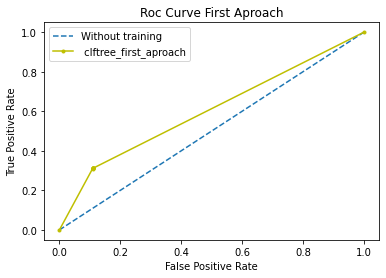

In [16]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clftree_first_aproach.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree_first_aproach.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clftree_first_aproach' , color = "y")
# Axes labels
pyplot.title('Roc Curve First Aproach')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/TREE Model - Roc Curve First Aproach.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

## Building the Model

In [20]:
# Read Data Frame 
df_normalized = pd.read_csv('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_normalized.csv')

In [21]:
# Liberias Precargadas al inicio del notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [22]:
# Inputs y Target 
X = df_normalized.drop(['lp_seg_hogar'], axis = 1)
y= df_normalized['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


In [23]:
# We adjust our training and test set. (80-20)
test_size = 0.2
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [24]:
# Instantiate the classifier
clftree = DecisionTreeClassifier(class_weight ='balanced')

In [25]:
# Train the model
clftree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [26]:
# Predictions
clftree.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [27]:
# Probabilities
clftree.predict_proba(X_test)[:, 1]

array([0., 0., 0., ..., 1., 0., 0.])

First results. The results obtained from train and test using the recall metric as a measure show that the model is not generalizing well. There is a serious overfitting situation that I need to solve. We will confirm it by Cross Validation. To look for solutions and as a next step we will use Grid Search to search for the best parameters to use with this model and to obtain a correct metric.


In [28]:
# Look for for oversampling. First results with the chosen metric "Recall" to see if our model generalizes well.
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clftree.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clftree.predict(X_test)))

===========RECALL TRAIN============
recall = 0.9999781726109923
===========RECALL TEST=============
recall = 0.42424242424242425


## Cross validation techniques.  Metrics: Cross validation
We use Cross Validation iteratting 5 times throughout the training set.

- We will set aside 1/5 samples.
- We train the model with the remaining 4/5 samples.
- We will measure with different metrics the result obtained on the set aside samples.
- This means that we do 5 independent trainings.
- The results will be the average of the 5 previous metrics.

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clftree,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clftree,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clftree,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.42903478015619845, 0.41830122591943963, 0.4237217764846483)

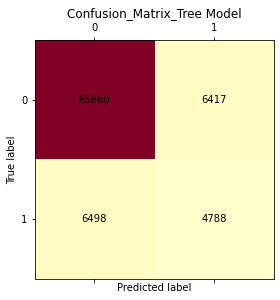

In [29]:
# Plot Confussion matrix 
confusion_matrix_clftree = confusion_matrix(y_test,clftree.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(confusion_matrix_clftree, cmap=plt.cm.YlOrRd)
for i in range(confusion_matrix_clftree.shape[0]):
    for j in range(confusion_matrix_clftree.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_clftree[i, j], va='center', ha='center')

plt.title('Confusion_Matrix_Tree Model')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/TREE Model - Confusion_matrix_Tree.png', dpi=75,bbox_inches='tight')
plt.show()

In [30]:
# Results obtained from the Tree model.

accuracy_score_clftree = accuracy_score(y_test,clftree.predict(X_test))
precision_clftree  = precision_score(y_test,clftree.predict(X_test))
recall_clftree = recall_score(y_test,clftree.predict(X_test))
f1_score_clftree = f1_score(y_test,clftree.predict(X_test))
roc_auc_score_clftree = roc_auc_score(y_test,clftree.predict_proba(X_test)[:, 1])

print('==== knn RESULTS ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_clftree )
print('------------------------------------')
print('precision  =',precision_clftree)
print('------------------------------------')
print('recall =', recall_clftree)
print('------------------------------------')
print('f1_score =', f1_score_clftree)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_clftree)

==== knn RESULTS ====
------------------------------------
accuracy_score = 0.8454459509591565
------------------------------------
precision  = 0.42730923694779116
------------------------------------
recall = 0.42424242424242425
------------------------------------
f1_score = 0.4257703081232493
------------------------------------
roc_auc_score = 0.6677919670157866


## Draw Roc Curve

Without training: ROC AUC=0.500
Tree: ROC AUC=0.668


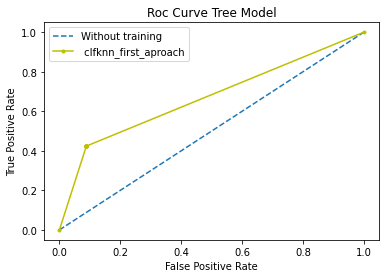

In [31]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clftree.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Tree: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfknn_first_aproach' , color = "y")
# Axes labels
pyplot.title('Roc Curve Tree Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/TREE Model - Roc Curve_Tree.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

# GridSearchCV  

We evaluate and select the parameters of a model. By providing a model and the parameters to be tested, we can evaluate the performance of the former against the latter by means of cross-validation.


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:

tree_grid_params = {       
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [100,115,130]
    }

treegs = GridSearchCV(
        clftree,
        tree_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )

In [34]:
treegs.fit(X_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.8min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [100, 115, 130],
                         'min_samples_split': [2, 4, 6]},
             verbose=1)

In [35]:
treegs.best_score_

0.7407292401443969

In [36]:
treegs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=100)

In [37]:
treegs.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 100,
 'min_samples_split': 2}

## Hacemos el modelo con los mejores parametros

In [38]:
clftree_gs = DecisionTreeClassifier(criterion = 'gini', class_weight ='balanced',
                                 max_depth=8,min_samples_leaf=100,
                                 min_samples_split = 2)

In [39]:
clftree_gs.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_leaf=100)

In [40]:
clftree_gs.predict(X_test)

array([1., 0., 0., ..., 0., 1., 0.])

In [41]:
clftree_gs.predict_proba(X_test)[:, 1]

array([0.64702432, 0.11021766, 0.01140618, ..., 0.22212344, 0.71274191,
       0.00526482])

Evaluation of overfitting __ The results obtained from train and test using the recall metric as a measure show that the overfitting has been solved by using better parameters and confirmed by Cross Validation and different metric averages. 


In [42]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clftree_gs.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clftree_gs.predict(X_test)))

===========RECALL TRAIN============
recall = 0.842951936089405
===========RECALL TEST=============
recall = 0.8446748183590289


## Metrics: Cross validation

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clftree_gs,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clftree_gs,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clftree_gs,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.32832560822935536, 0.8554816112084062, 0.4742642825160278)

### Confussion Matrix

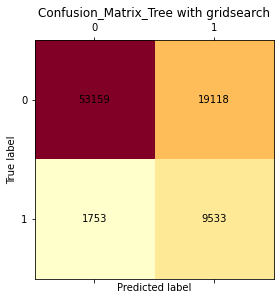

In [43]:
# Plot Confussion matrix 
confusion_matrix_gs = confusion_matrix(y_test,clftree_gs.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(confusion_matrix_gs, cmap=plt.cm.YlOrRd)
for i in range(confusion_matrix_gs.shape[0]):
    for j in range(confusion_matrix_gs.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix_gs[i, j], va='center', ha='center')

plt.title('Confusion_Matrix_Tree with gridsearch')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/TREE Model - Confusion_matrix_Tree_GridSearch.png', dpi=75,bbox_inches='tight')
plt.show()


In [44]:
# Results obtained from the model with GridSearch.

accuracy_score_gs = accuracy_score(y_test,clftree_gs.predict(X_test))
precision_gs  = precision_score(y_test,clftree_gs.predict(X_test))
recall_gs = recall_score(y_test,clftree_gs.predict(X_test))
f1_score_gs = f1_score(y_test,clftree_gs.predict(X_test))
roc_auc_score_gs = roc_auc_score(y_test,clftree_gs.predict_proba(X_test)[:, 1])

print('==== Tree GridSearch RESULTS ====')
print('------------------------------------')
print('accuracy_score =', accuracy_score_gs )
print('------------------------------------')
print('precision  =',precision_gs)
print('------------------------------------')
print('recall =', recall_gs)
print('------------------------------------')
print('f1_score =', f1_score_gs)
print('------------------------------------')
print('roc_auc_score =', roc_auc_score_gs)

==== Tree GridSearch RESULTS ====
------------------------------------
accuracy_score = 0.7502363486231944
------------------------------------
precision  = 0.3327283515409584
------------------------------------
recall = 0.8446748183590289
------------------------------------
f1_score = 0.477401908005108
------------------------------------
roc_auc_score = 0.8694661371681359


Without training: ROC AUC=0.500
Knn: ROC AUC=0.869


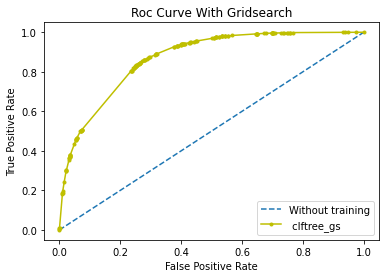

In [45]:
# We paint Roc Curve
# We generate an untrained classifier, which will assign 0 to everything
no_train = [0 for _ in range(len(X_test))]
# We calculate the AUC
ns_auc = roc_auc_score(y_test, no_train)
lr_auc = roc_auc_score(y_test, clftree_gs.predict_proba(X_test)[:, 1])
# Print
print('Without training: ROC AUC=%.3f' % (ns_auc))
print('Knn: ROC AUC=%.3f' % (lr_auc))
# We calculate the ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, no_train)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clftree_gs.predict_proba(X_test)[:, 1])
# We paint the ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Without training')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clftree_gs' , color = "y")
# Axes labels
pyplot.title('Roc Curve With Gridsearch')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('C:/Users/manue/TFM/Financial-Product-Sales-Forecast-Model/Pictures/TREE Model - Roc Curve with Gridsearch.png', dpi=75,bbox_inches='tight')
plt.show()
pyplot.show()

In [47]:
print('Results 1rst aproach: RECALL %f, AUC %f' %(recall_first_aproach, roc_auc_score_first_aproach))
print('Results model: RECALL %f, AUC %f' %(recall_clftree, roc_auc_score_clftree))
print('Results model with gridsearch: RECALL %f, AUC %f' %(recall_gs, roc_auc_score_gs))

Results 1rst aproach: RECALL 0.310564, AUC 0.600889
Results model: RECALL 0.424242, AUC 0.667792
Results model with gridsearch: RECALL 0.844675, AUC 0.869466


## Model  Conclusions

- The metrics chosen__ to evaluate our Decision Tree classification model are __Recall and AUC - Roc Curve.__. 
- We start our model with a __first approximation__ obtaining __very improvable__ results. Recall 0.30__ The database used is the original one without any preprocessing. 
- We evolve our model. We use as database df_normalized already preprocessed in our preprocessing block. (Adapted, applied Label Encoder and Standar Scaler).  
- Since our __Target is very unbalanced__ at the rate of 87% No and 13% Yes, the parameter 'class_weight = 'balanced' has been used at the beginning of the model.
- We can see that our training set did not generalize well. There is a big difference between the results obtained from Test and Train. 0.99 Train - 0.42 Test. We can in this case confirm the existence of overfitting__ We check by Cross Validation by obtaining averages of different metrics.

- We need to improve the model and for this we use GridSearch to search for solutions and better parameters. Once obtained, we train again and get again Recall 0.87 Train - 0.86 Test metrics to confirm among other things that we have managed to solve the overfitting and that our model has managed to generalize well. We confirm with Cross Validation by obtaining the averages of different metrics with 5 validations.
- Our finally chosen metrics are Reccal 0.84 and AUC 0.86 which we consider appropriate for the explanation of our model. 
- In the diagonal of hits we have 53159 and 9533. In our model, the detection of clients who do want to take out insurance takes precedence.  We need to obtain a good rate of true positives. Recall that our target metrics are Recall and AUC. By detecting those customers who are likely to have home insurance, we can work more directly. All this with the objective of time optimization and commercial efficiency. The Recall result obtained is optimal, with 84% and 87% in AUC.
- We are missing, among many others, variables and data such as customer income, children, type of work, real salary in euros obtained, place of residence ... etc. 
- We will continue to search with other models for better results with the available variables.

### Tree visualization (¡¡¡¡¡¡¡ PENDIENTE¡¡¡)

In [51]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clftree_gs, max_depth = 3,out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 120,width = 10000)

InvocationException: GraphViz's executables not found

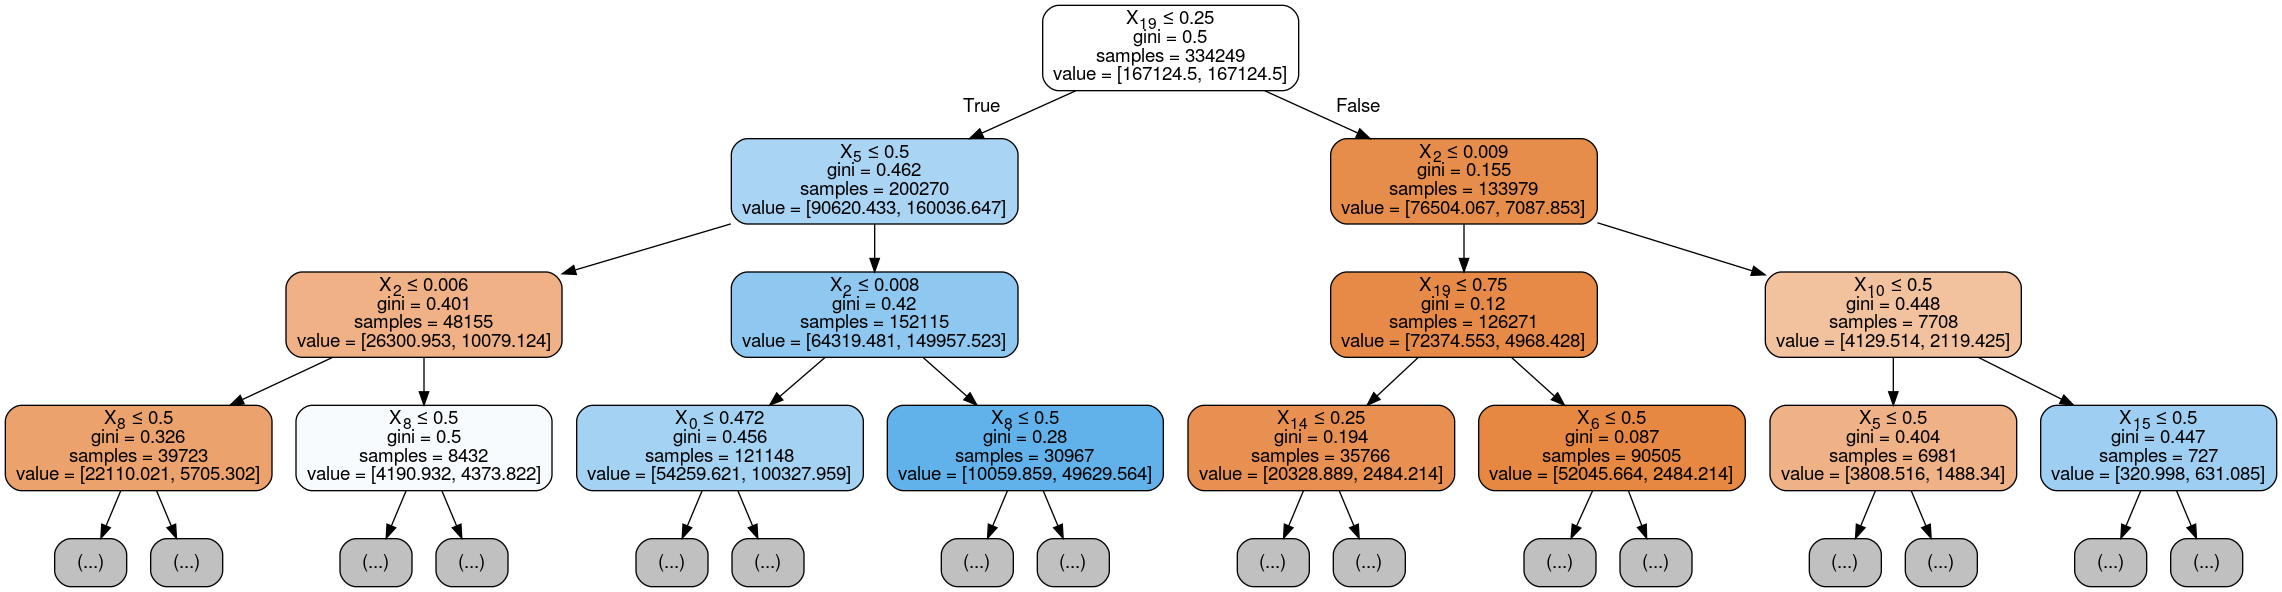

In [66]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO  
dot_data = StringIO()
export_graphviz(clftree_gs, max_depth = 3,out_file=dot_data,filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png(),height = 120,width = 10000)